### naive implement

In [16]:
from sklearn.datasets import fetch_20newsgroups

In [17]:
df = fetch_20newsgroups()

In [18]:
df.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [19]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics', 'rec.sport.baseball']
train = fetch_20newsgroups(subset = 'train', categories = categories)
test = fetch_20newsgroups(subset = 'test', categories = categories)

In [20]:
print(train.data[3])

From: brucek@Ingres.COM (Bruce Kleinman)
Subject: Re: When did Dodgers move from NY to LA?
Article-I.D.: pony.1993Apr6.195730.20277
Organization: Ingres Corporation, A subsidiary of The ASK Group, Inc.
Lines: 6

In article <1993Apr5.160030.2328@ncar.ucar.edu> tparker@music.scd.ucar.edu (Tom Parker) writes:
>I have a bet with my buddy on when the Dodgers moved from NY to LA.  Does
>anyone know what year they moved?
>

The Dodgers' first year in LA was 1958.



In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [22]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

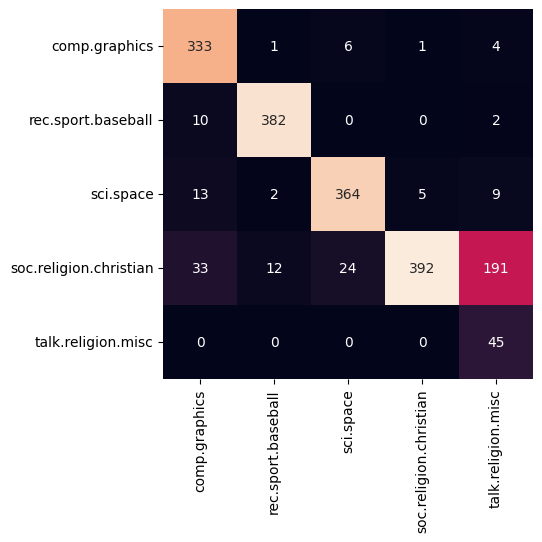

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.show()


In [24]:
def predict_category(s, train = train, model = model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [25]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [26]:
predict_category('discussing the screen resolution')

'comp.graphics'

In [27]:
predict_category('pitcher')

'rec.sport.baseball'